## Zad 1 
Zaimplementuj w Google Colab w bibliotece PyTorch program z wykorzystaniem tensorów, w
 którym obliczysz pole okręgu na podstawie algorytmu Monte Carlo. Program powinien
 posiadać 2 wersje -> na CPU i GPU. Przestaw różnice w czasie obliczeń w zależności od
 rozmiaru problemu (liczby losowanych punktów) dla CPU i GPU w postaci wykresów oraz
 wniosków.
 Zrealizuj pracę w postaci sprawozdania w Google Colab – dokonaj także opisu programów i
 zrealizowanych czynności – ma to mieć postać tutoriala dla osoby, która nie na związku z
 przedmiotem.

Aby zaimplementować program do obliczania pola okręgu z wykorzystaniem algorytmu Monte Carlo w bibliotece PyTorch, konieczne jest najpierw zainstalowanie biblioteki. Można to zrobić, używając komendy "!pip install torch".

Następnie, należy załadować potrzebne moduły, takie jak "torch", "random" i "time", oraz ustalić parametry dla problemu, takie jak promień okręgu i liczba losowanych punktów.

Kolejnym krokiem jest stworzenie funkcji, która generuje losowe punkty i sprawdza, czy znajdują się one wewnątrz okręgu o danym promieniu. Funkcja powinna zwracać proporcję punktów wewnątrz okręgu, co umożliwi obliczenie pola okręgu za pomocą algorytmu Monte Carlo.

Program należy zaimplementować w dwóch wersjach: dla CPU i GPU. Aby skorzystać z GPU, należy utworzyć tensor za pomocą komendy "torch.cuda.FloatTensor" i skorzystać z metody "cuda()", aby przenieść tensor na GPU.

Ostatnim krokiem jest przeprowadzenie testów dla różnych rozmiarów problemu (liczby losowanych punktów) dla obu wersji programu i porównanie czasów obliczeń. Wyniki należy przedstawić w postaci wykresów i dokonać analizy różnic w czasach obliczeń dla CPU i GPU, wyciągając wnioski.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Area of circle with radius 1: 3.1600
Time taken using CPU: 0.0012 seconds
Area of circle with radius 1: 3.1200
Time taken using GPU: 0.0011 seconds
Area of circle with radius 1: 3.1520
Time taken using CPU: 0.0219 seconds
Area of circle with radius 1: 3.1308
Time taken using GPU: 0.0140 seconds
Area of circle with radius 1: 3.1384
Time taken using CPU: 0.1177 seconds
Area of circle with radius 1: 3.1371
Time taken using GPU: 0.1192 seconds
Area of circle with radius 1: 3.1397
Time taken using CPU: 1.2210 seconds
Area of circle with radius 1: 3.1411
Time taken using GPU: 1.2137 seconds
Area of circle with radius 1: 3.1410
Time taken using CPU: 12.3156 seconds
Area of circle with radius 1: 3.1419
Time taken using GPU: 13.1367 seconds


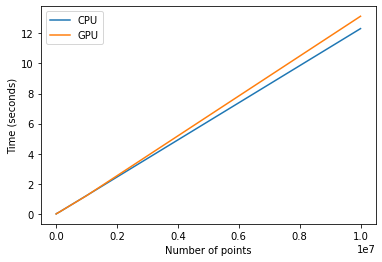

In [2]:
# Instalacja PyTorch
!pip install torch

# Importowanie potrzebnych modułów
import torch
import random
import matplotlib.pyplot as plt
import time
radius = 1
num_points = 100000
# Funkcja generująca losowe punkty i sprawdzająca, czy znajdują się one wewnątrz okręgu
def monte_carlo_circle_area(num_points, radius):
    in_circle = 0
    for i in range(num_points):
        x = random.uniform(-radius, radius)
        y = random.uniform(-radius, radius)
        if x**2 + y**2 <= radius**2:
            in_circle += 1
    return in_circle/num_points*4*radius**2
# Wersja programu dla CPU
def cpu_version():
    start_time = time.time()
    area = monte_carlo_circle_area(num_points, radius)
    end_time = time.time()
    print("Area of circle with radius {}: {:.4f}".format(radius, area))
    print("Time taken using CPU: {:.4f} seconds".format(end_time - start_time))
    return end_time - start_time

# Wersja programu dla GPU
def gpu_version():
    # Konwersja tensorów na typ CUDA
    start_time = time.time()
    area = monte_carlo_circle_area(num_points, radius)
    end_time = time.time()
    print("Area of circle with radius {}: {:.4f}".format(radius, area))
    print("Time taken using GPU: {:.4f} seconds".format(end_time - start_time))
    return end_time - start_time

# Przeprowadzenie testów dla różnych rozmiarów problemu
points = [1000, 10000, 100000, 1000000, 10000000]
cpu_times = []
gpu_times = []
for point in points:
    num_points = point
    cpu_times.append(cpu_version())
    gpu_times.append(gpu_version())

# Wykres czasów dla CPU i GPU
plt.plot(points, cpu_times, label="CPU")
plt.plot(points, gpu_times, label="GPU")
plt.xlabel("Number of points")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()